Теоретичне обґрунтування границь [1/g, 1]:
Для кожного стовпця j: u₁ⱼ + u₂ⱼ + ⋯ + u_gⱼ = 1 і uₖⱼ ≥ 0.
За нерівністю Коші–Буняковського (або нерівністю середніх):
(u₁ⱼ + ⋯ + u_gⱼ)² ≤ g(u₁ⱼ² + ⋯ + u_gⱼ²).
Підставляючи (1)² = 1, отримаємо: 1 ≤ g Σ uₖⱼ² ⇒ Σ uₖⱼ² ≥ 1/g.
Це виконується для кожного стовпця, тому середнє по N також ≥ 1/g.
Таким чином, PC ≥ 1/g.
Верхня межа: якщо для деякого k маємо uₖⱼ = 1, а решта = 0, тоді Σ uₖⱼ² = 1.
Отже, PC = 1. Неможливо отримати суму квадратів більше за 1, бо всі u ≤ 1.
Таким чином, PC ≤ 1.
Висновок: PC ∈ [1/g, 1].
g = 2 | N = 100 | trials = 1000
Спостережуване min PC = 0.571479
Спостережуване mean PC = 0.614067
Спостережуване max PC = 0.655774
Теоретичні межі: min = 1/g = 0.500000, max = 1.0
PC для рівномірної U (усі 1/g) = 0.500000 (очікувано = 1/g)
PC для чіткої U (усі об’єкти в одному кластері) = 1.000000 (очікувано = 1)


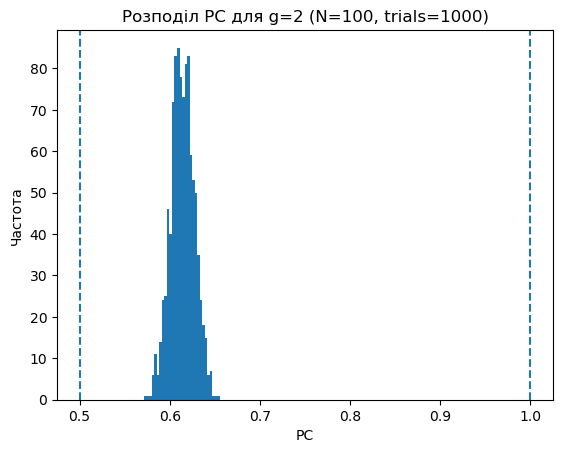

g = 3 | N = 100 | trials = 1000
Спостережуване min PC = 0.403580
Спостережуване mean PC = 0.430329
Спостережуване max PC = 0.460287
Теоретичні межі: min = 1/g = 0.333333, max = 1.0
PC для рівномірної U (усі 1/g) = 0.333333 (очікувано = 1/g)
PC для чіткої U (усі об’єкти в одному кластері) = 1.000000 (очікувано = 1)


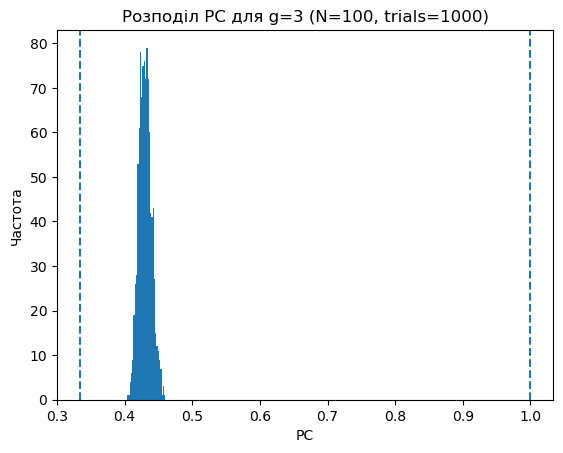

g = 4 | N = 100 | trials = 1000
Спостережуване min PC = 0.307014
Спостережуване mean PC = 0.327962
Спостережуване max PC = 0.348168
Теоретичні межі: min = 1/g = 0.250000, max = 1.0
PC для рівномірної U (усі 1/g) = 0.250000 (очікувано = 1/g)
PC для чіткої U (усі об’єкти в одному кластері) = 1.000000 (очікувано = 1)


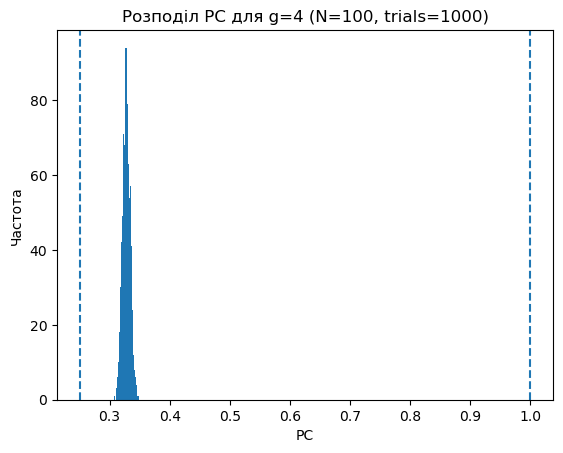

g = 5 | N = 100 | trials = 1000
Спостережуване min PC = 0.247193
Спостережуване mean PC = 0.263950
Спостережуване max PC = 0.279509
Теоретичні межі: min = 1/g = 0.200000, max = 1.0
PC для рівномірної U (усі 1/g) = 0.200000 (очікувано = 1/g)
PC для чіткої U (усі об’єкти в одному кластері) = 1.000000 (очікувано = 1)


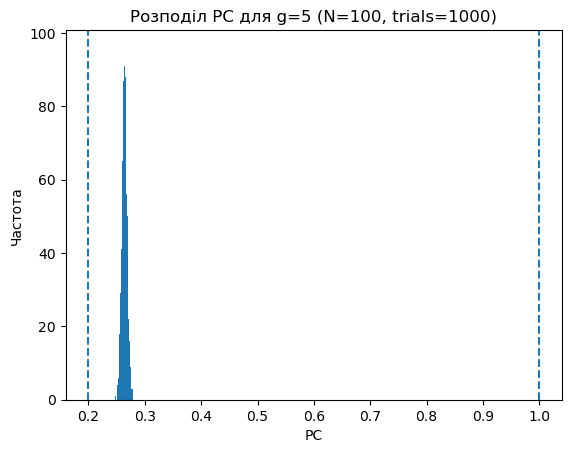

g = 8 | N = 100 | trials = 1000
Спостережуване min PC = 0.158580
Спостережуване mean PC = 0.165977
Спостережуване max PC = 0.172767
Теоретичні межі: min = 1/g = 0.125000, max = 1.0
PC для рівномірної U (усі 1/g) = 0.125000 (очікувано = 1/g)
PC для чіткої U (усі об’єкти в одному кластері) = 1.000000 (очікувано = 1)


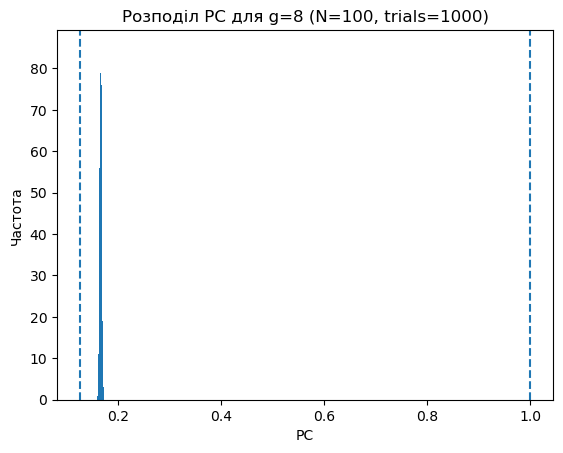

g = 10 | N = 100 | trials = 1000
Спостережуване min PC = 0.127708
Спостережуване mean PC = 0.133171
Спостережуване max PC = 0.138279
Теоретичні межі: min = 1/g = 0.100000, max = 1.0
PC для рівномірної U (усі 1/g) = 0.100000 (очікувано = 1/g)
PC для чіткої U (усі об’єкти в одному кластері) = 1.000000 (очікувано = 1)


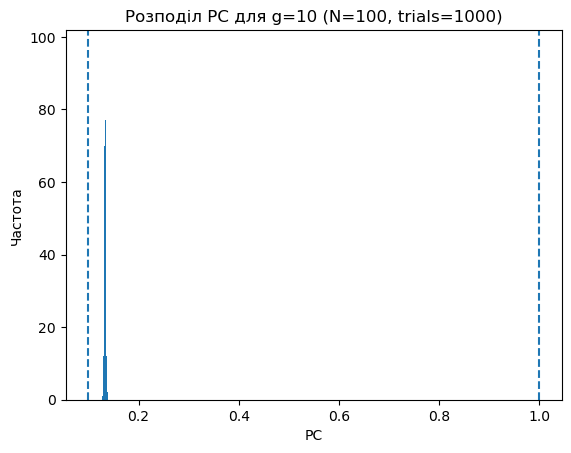

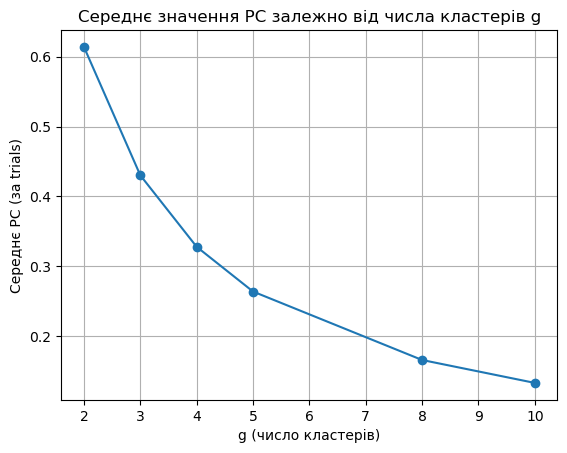

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def partition_coefficient(U: np.ndarray) -> float:
    if U.ndim != 2:
        raise ValueError("U должно быть двумерным (g, N).")
    g, N = U.shape
    col_sums = U.sum(axis=0)
    if not np.allclose(col_sums, np.ones(N), atol=1e-8):
        raise ValueError("Сумма по каждому столбцу U должна быть равна 1.")
    pc_value = np.sum(U**2) / N
    return float(pc_value)


def random_U(g: int, N: int) -> np.ndarray:
    U = np.random.rand(g, N)
    U /= U.sum(axis=0, keepdims=True)
    return U


def uniform_U(g: int, N: int) -> np.ndarray:
    return np.full((g, N), 1.0 / g)


def crisp_U(g: int, N: int, cluster_index: int = 0) -> np.ndarray:
    U = np.zeros((g, N))
    U[cluster_index, :] = 1.0
    return U


def experiment(gs, N=50, trials=600, random_seed=42):
    np.random.seed(random_seed)

    print("="*70)
    # Теоретичне обґрунтування границь [1/g, 1]
    print("Теоретичне обґрунтування границь [1/g, 1]:")
    print("Для кожного стовпця j: u₁ⱼ + u₂ⱼ + ⋯ + u_gⱼ = 1 і uₖⱼ ≥ 0.")
    print("За нерівністю Коші–Буняковського (або нерівністю середніх):")
    print("(u₁ⱼ + ⋯ + u_gⱼ)² ≤ g(u₁ⱼ² + ⋯ + u_gⱼ²).")
    print("Підставляючи (1)² = 1, отримаємо: 1 ≤ g Σ uₖⱼ² ⇒ Σ uₖⱼ² ≥ 1/g.")
    print("Це виконується для кожного стовпця, тому середнє по N також ≥ 1/g.")
    print("Таким чином, PC ≥ 1/g.")
    print(
        "Верхня межа: якщо для деякого k маємо uₖⱼ = 1, а решта = 0, тоді Σ uₖⱼ² = 1.")
    print("Отже, PC = 1. Неможливо отримати суму квадратів більше за 1, бо всі u ≤ 1.")
    print("Таким чином, PC ≤ 1.")
    print("Висновок: PC ∈ [1/g, 1].")
    print("="*70)

    results = {}
    for g in gs:
        pcs = []
        for t in range(trials):
            U = random_U(g, N)
            pcs.append(partition_coefficient(U))
        pcs = np.array(pcs)
        results[g] = pcs

        print(f"g = {g} | N = {N} | trials = {trials}")
        print(f"Спостережуване min PC = {pcs.min():.6f}")
        print(f"Спостережуване mean PC = {pcs.mean():.6f}")
        print(f"Спостережуване max PC = {pcs.max():.6f}")
        print(f"Теоретичні межі: min = 1/g = {1.0/g:.6f}, max = 1.0")
        pc_uniform = partition_coefficient(uniform_U(g, N))
        pc_crisp = partition_coefficient(crisp_U(g, N))
        print(
            f"PC для рівномірної U (усі 1/g) = {pc_uniform:.6f} (очікувано = 1/g)")
        print(
            f"PC для чіткої U (усі об’єкти в одному кластері) = {pc_crisp:.6f} (очікувано = 1)")

        plt.figure()
        plt.hist(pcs, bins=30)
        plt.title(f"Розподіл PC для g={g} (N={N}, trials={trials})")
        plt.xlabel("PC")
        plt.ylabel("Частота")
        plt.axvline(1.0/g, linestyle='dashed')
        plt.axvline(1.0, linestyle='dashed')
        plt.show()

    gs_sorted = sorted(results.keys())
    means = [results[g].mean() for g in gs_sorted]
    plt.figure()
    plt.plot(gs_sorted, means, marker='o')
    plt.title("Середнє значення PC залежно від числа кластерів g")
    plt.xlabel("g (число кластерів)")
    plt.ylabel("Середнє PC (за trials)")
    plt.grid(True)
    plt.show()

    return results


if __name__ == "__main__":
    gs = [2, 3, 4, 5, 8, 10]
    results = experiment(gs, N=100, trials=1000, random_seed=12345)